In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def missing_percentage(df):
    total = df.isna().sum().sort_values(ascending=False)
    total.name = 'Total'
    percent = round(100* (total/len(train)), 2)
    percent.name = 'Percentage'
    x = pd.concat([total, percent], axis=1)
    return x.loc[x['Total']!=0]

def value_count_percentage(df, column):
    
    total = df[column].value_counts(dropna=False).sort_values(ascending=False)
    total.name = 'Total'
    percent = round(100 * df[column].value_counts(dropna=False, normalize=True).sort_values(ascending=False), 2)
    percent.name = 'Percentage'
    return pd.concat([total, percent], axis=1)    

In [3]:
train_file = '../data/counterfeit_train.csv'
test_file = '../data/counterfeit_test.csv'
print(train_file)
print(test_file)

../data/counterfeit_train.csv
../data/counterfeit_test.csv


In [4]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [5]:
train_copied = train.copy()
test_copied = test.copy()

In [6]:
train.shape

(6818, 12)

In [7]:
test.shape

(1705, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   Counterfeit_Weight   1408 non-null   float64
 2   DistArea_ID          1705 non-null   object 
 3   Active_Since         1705 non-null   int64  
 4   Medicine_MRP         1705 non-null   float64
 5   Medicine_Type        1705 non-null   object 
 6   SidEffect_Level      1705 non-null   object 
 7   Availability_rating  1705 non-null   float64
 8   Area_Type            1705 non-null   object 
 9   Area_City_Type       1705 non-null   object 
 10  Area_dist_level      1705 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 146.6+ KB


In [10]:
train.sample(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
5420,UAV72,22.000,Area010,1996,103.1436,Antipyretics,critical,0.204009,MidTownResidential,Tier 3,Unknown,302.0872
4849,MPG14,8.665,Area046,1995,236.4720,Antibiotics,mild,0.055560,DownTown,Tier 1,Small,3282.2080
5655,THP41,10.195,Area010,1996,245.8616,Statins,mild,0.139288,MidTownResidential,Tier 3,Unknown,581.7232
2735,KDQ15,NaN,Area027,1983,52.7454,Antiseptics,mild,0.037213,CityLimits,Tier 3,Medium,406.6178
1909,MYA10,20.050,Area035,2002,217.4954,Antiseptics,mild,0.023364,DownTown,Tier 2,Small,1780.1632
5603,XPX11,16.650,Area013,1985,48.6190,OralContraceptives,mild,0.027008,DownTown,Tier 3,High,405.9520
3012,UCV73,7.705,Area035,2002,138.4678,Hreplacements,mild,0.149275,DownTown,Tier 2,Small,1130.3424
3654,XWX56,17.650,Area045,2000,137.7020,Antiseptics,mild,0.047743,DownTown,Tier 2,Unknown,872.0120
5255,IZD14,15.950,Area045,2000,60.0692,Antibiotics,mild,0.013000,DownTown,Tier 2,Unknown,950.5764
6487,PXM14,12.900,Area035,2002,110.3042,Tranquilizers,mild,0.050574,DownTown,Tier 2,Small,3089.1260


In [11]:
test.sample(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
1215,HJY10,13.950,Area010,1996,63.8324,Antimalarial,mild,0.129203,MidTownResidential,Tier 3,Unknown
1322,CZV11,13.450,Area035,2002,129.5440,Antifungal,mild,0.013000,DownTown,Tier 2,Small
958,IMO12,14.800,Area018,2007,68.9562,Antipyretics,critical,0.081149,Industrial,Tier 3,Medium
269,STR65,NaN,Area027,1983,122.3202,MuscleRelaxants,mild,0.060008,CityLimits,Tier 3,Medium
829,MXK51,11.195,Area018,2007,128.1492,Cardiac,critical,0.041838,Industrial,Tier 3,Medium
1207,NDP41,13.650,Area035,2002,67.3246,Cardiac,mild,0.039676,DownTown,Tier 2,Small
826,PNK10,6.105,Area013,1985,137.0704,Antipyretics,critical,0.050668,DownTown,Tier 3,High
796,WZF50,22.150,Area049,1997,206.4452,Hreplacements,mild,0.134439,DownTown,Tier 1,Medium
717,QKH44,9.600,Area049,1997,46.5506,Antibiotics,mild,0.048409,DownTown,Tier 1,Medium
323,XFX12,9.915,Area035,2002,106.2436,Antibiotics,mild,0.129227,DownTown,Tier 2,Small


In [12]:
train.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [13]:
test.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating
count,1408.000000,1705.000000,1705.000000,1705.000000
mean,14.328604,1995.814076,150.857964,0.078963
std,4.616129,8.385310,62.575018,0.052076
min,5.855000,1983.000000,41.590000,0.013000
25%,10.300000,1985.000000,102.880400,0.039831
50%,14.300000,1997.000000,153.715400,0.066693
75%,18.300000,2002.000000,195.389800,0.107220
max,22.650000,2007.000000,277.188400,0.324090


In [14]:
missing_percentage(train)

,Total,Percentage
Counterfeit_Weight,1166,17.1


In [15]:
missing_percentage(test)

,Total,Percentage
Counterfeit_Weight,297,4.36


In [16]:
train.nunique(dropna=False)

Medicine_ID            1557
Counterfeit_Weight      415
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64

In [17]:
test.nunique(dropna=False)

Medicine_ID            1049
Counterfeit_Weight      326
DistArea_ID              10
Active_Since              9
Medicine_MRP           1580
Medicine_Type            16
SidEffect_Level           2
Availability_rating    1588
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
dtype: int64

## Value counts and Percentage of Categorical Features of Train set

In [18]:
value_count_percentage(train, 'DistArea_ID')

,Total,Percentage
Area017,760,11.15
Area013,749,10.99
Area046,749,10.99
Area035,748,10.97
Area049,739,10.84
Area045,736,10.79
Area027,735,10.78
Area018,729,10.69
Area010,442,6.48
Area019,431,6.32


Categorical : Nominal variable : **DistArea_ID**

there are 10 categories in this feature, and Area010 & Area019 have 4% less sales all other Areas have same % of Sale

In [19]:
value_count_percentage(train, 'Active_Since')

,Total,Percentage
1983,1166,17.10
2005,760,11.15
1985,749,10.99
1995,749,10.99
2002,748,10.97
1997,739,10.84
2000,736,10.79
2007,729,10.69
1996,442,6.48


Categorical : Ordinal Variable : **Active_Since**

there are 9 categories in this features, couterfeit sale is active from 1983 means it has more medicine sale, in other year like 2005, 1985, etc have same sale , but 1996 have only 6.5% sales

In [20]:
value_count_percentage(train,'Medicine_Type')

,Total,Percentage
Hreplacements,976,14.32
Antibiotics,970,14.23
Antiseptics,724,10.62
OralContraceptives,694,10.18
Antipyretics,536,7.86
Cardiac,522,7.66
Mstablizers,514,7.54
Tranquilizers,420,6.16
Analgesics,356,5.22
Antimalarial,339,4.97


Categorical : Nominal Varialble : **Medicine_Type**

* We can see that 14% of sale of Hreplacements & Antibiotics 
* Antiseptics and OralContraceptives around 10-11% of sale 
* that means these medicines are selling more in market and need of these medicines are also more as compared to others

In [21]:
value_count_percentage(train,'SidEffect_Level')

,Total,Percentage
mild,4434,65.03
critical,2384,34.97


Categorical : Ordinal Variable : **SidEffect_Level**

* these counterfeit medicines which 65% medicines have mild side effect and 35% medicines have Critical side effect 

In [22]:
value_count_percentage(train,'Area_Type')

,Total,Percentage
DownTown,4481,65.72
MidTownResidential,873,12.80
CityLimits,735,10.78
Industrial,729,10.69


Categorical : Nominal Variable : **Area_Type**
* In Area type **DownTown** 65% have sold counterfeit medicines

In [23]:
value_count_percentage(train,'Area_City_Type')

,Total,Percentage
Tier 3,2655,38.94
Tier 2,2244,32.91
Tier 1,1919,28.15


Categorical : Ordinal Variable : **Area_City_Type**
* Tier 3 have highest sales around 39% 
* Tier 2 and 3 have 33% & 28% sale 

In [24]:
value_count_percentage(train,'Area_dist_level')

,Total,Percentage
Medium,2203,32.31
Unknown,1938,28.42
Small,1928,28.28
High,749,10.99


Categorical : Ordinal Variable : **Area_dist_level**
* High Area Dist level have lowest sale around 11% 

### Numerical Features 

Numerical : Continous Variable : **Counterfeit_Sales**

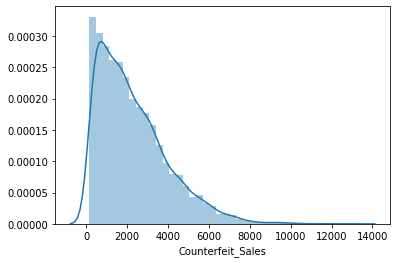

In [25]:
sns.distplot(train['Counterfeit_Sales'], bins=40)
plt.show()

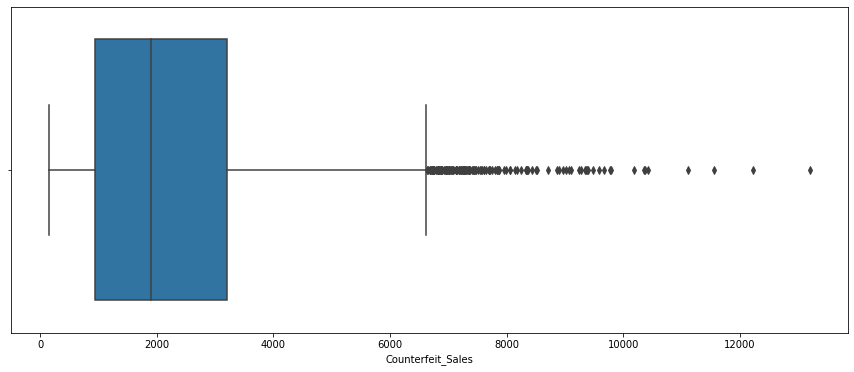

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x=train.Counterfeit_Sales)
plt.show()

In [27]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

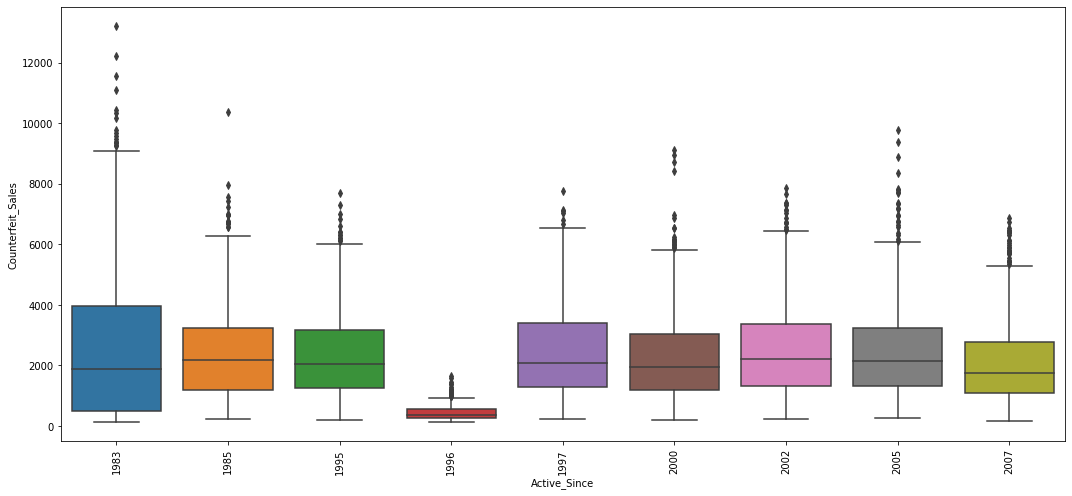

In [28]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='Active_Since', y='Counterfeit_Sales')
plt.xticks(rotation=90)
plt.show()

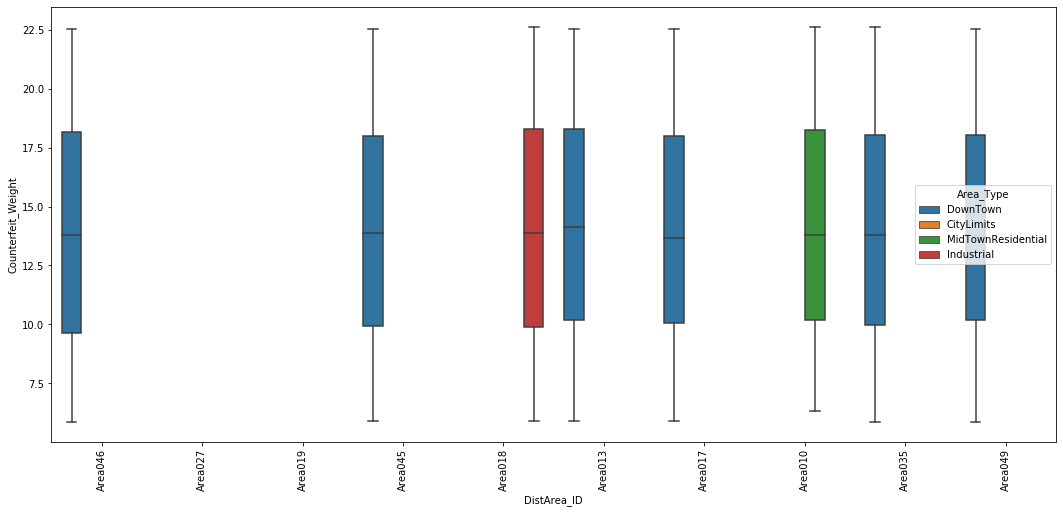

In [29]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='DistArea_ID', y='Counterfeit_Weight',hue='Area_Type')
plt.xticks(rotation=90)
plt.show()

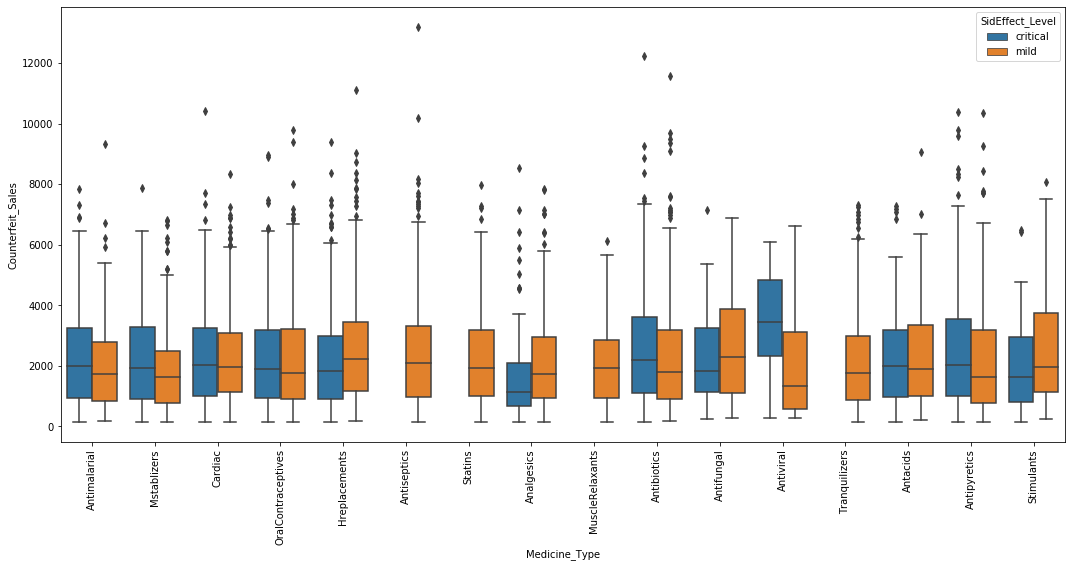

In [30]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='Medicine_Type', y='Counterfeit_Sales', hue='SidEffect_Level')
plt.xticks(rotation=90)
plt.show()

In [31]:
train.loc[train.Area_Type=='CityLimits', 'Counterfeit_Weight']#.isna().sum()

1      NaN
36     NaN
60     NaN
65     NaN
73     NaN
        ..
6757   NaN
6767   NaN
6770   NaN
6774   NaN
6791   NaN
Name: Counterfeit_Weight, Length: 735, dtype: float64

In [32]:
for i in train.columns:
#     print(i)
    if train.loc[train.Counterfeit_Weight.isna(),i].nunique(dropna=False) < 10:
        print(i)
        print(train.loc[train.Counterfeit_Weight.isna(),i].unique())

Counterfeit_Weight
[nan]
DistArea_ID
['Area027' 'Area019']
Active_Since
[1983]
SidEffect_Level
['mild' 'critical']
Area_Type
['CityLimits' 'MidTownResidential']
Area_City_Type
['Tier 3' 'Tier 1']
Area_dist_level
['Medium' 'Small']


Numerical : Continous Variable : **Counterfeit_Weight**

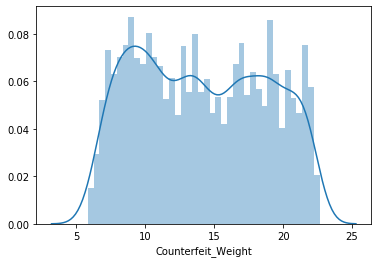

In [33]:
sns.distplot(train['Counterfeit_Weight'], bins=40)
plt.show()

Counterfeit_Weight has around 17% missing values and here we seeing that data distribution is uniform and weight range from 5 to 25 units.  highest peak in above plot between 7_10 units 


Numerical : Continuous Variable : **Availability_rating**

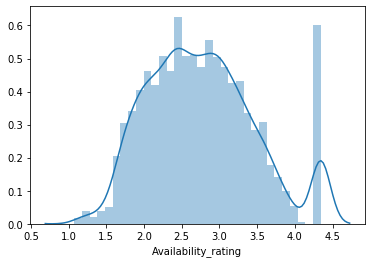

In [34]:
sns.distplot(np.log(train['Availability_rating']).abs())
plt.show()

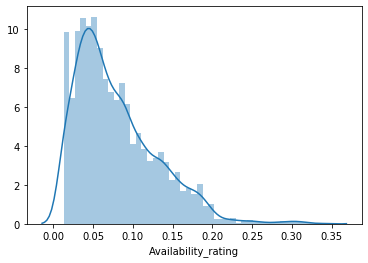

In [35]:
sns.distplot(train['Availability_rating'])
# nd_data = np.random.normal(train.Availability_rating.mean(), train.Availability_rating.std(), len(train))
# sns.distplot(nd_data)
plt.show()

Numerical : Continuous Variable : **Medicine_MRP**

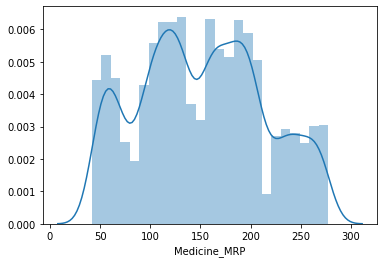

In [36]:
sns.distplot(train['Medicine_MRP'])
plt.show()

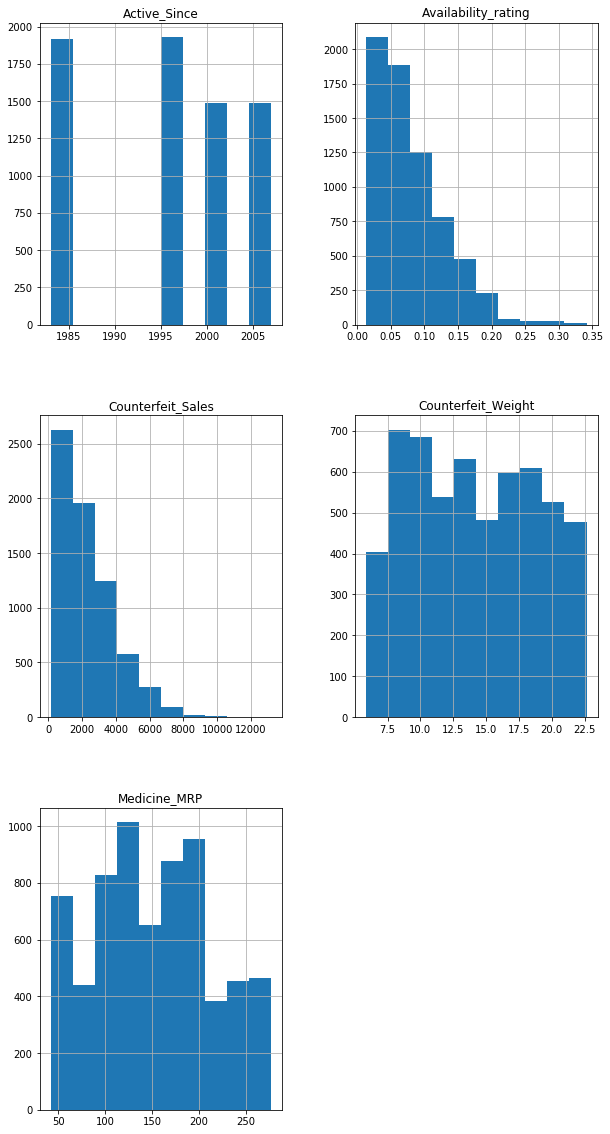

In [37]:
# plt.figure()
train.hist(figsize=(10,20))
plt.show()

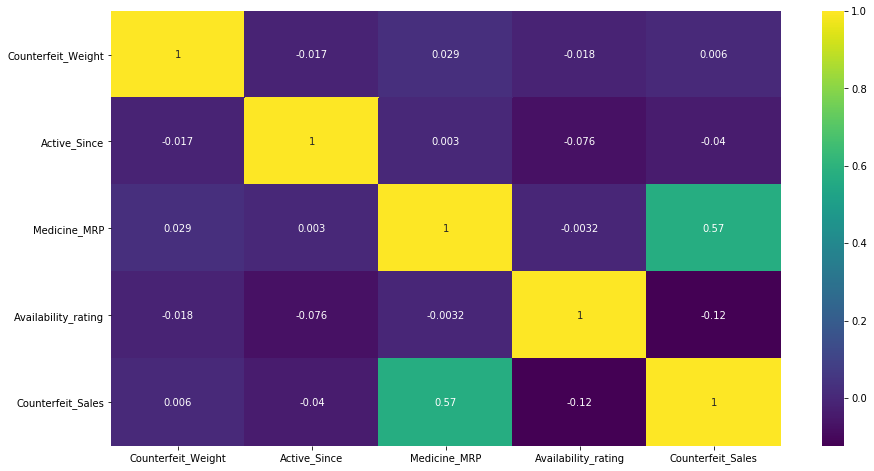

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=train.corr(), cmap='viridis')
plt.show()

In [39]:
for i in train.Medicine_Type.unique():
    print(i)
    print(train.loc[(train.Counterfeit_Weight.notna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'].mean())
    train.loc[(train.Counterfeit_Weight.isna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'] = train.loc[(train.Counterfeit_Weight.notna()) & (train.Medicine_Type == i), 'Counterfeit_Weight'].mean()
    test.loc[(test.Counterfeit_Weight.isna()) & (test.Medicine_Type == i), 'Counterfeit_Weight'] = test.loc[(test.Counterfeit_Weight.notna()) & (test.Medicine_Type == i), 'Counterfeit_Weight'].mean()

Antimalarial
14.360018315018314
Mstablizers
13.565442890442908
Cardiac
13.537223502304164
OralContraceptives
14.075856164383532
Hreplacements
14.296324626865596
Antiseptics
14.595380794701951
Statins
12.662678571428566
Analgesics
13.034803278688543
MuscleRelaxants
15.197168141592925
Antibiotics
14.400614143920526
Antifungal
15.206785714285704
Antiviral
14.335769230769229
Tranquilizers
14.346177325581412
Antacids
12.50933734939758
Antipyretics
14.664712643678167
Stimulants
14.364358974358973


In [40]:
# median_by_med_type = train.loc[train.Counterfeit_Weight.notna()][['Medicine_Type',
#                                                                   'Counterfeit_Weight']].groupby('Medicine_Type').median().reset_index()
# median_by_med_type

In [41]:
# train.loc[train.Counterfeit_Weight.notna()].groupby('Medicine_Type').mean()

# .agg({'Medicine_Type': 'count'})


In [42]:
# for i in median_by_med_type.Medicine_Type:
#     print(i)
#     print(train.loc[train.Counterfeit_Weight.isna() & train.Medicine_Type==i].shape)

In [43]:
# train.nunique()

In [44]:
# train.loc[train.Counterfeit_Weight.isna(), 'Counterfeit_Weight'] = train.loc[train.Counterfeit_Weight.notna(), 
#                                                                              'Counterfeit_Weight'].mean()

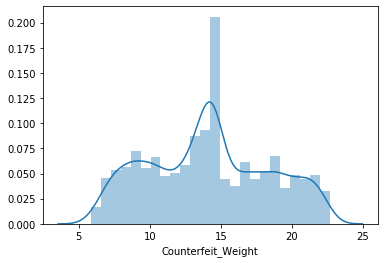

In [45]:
sns.distplot(train.Counterfeit_Weight)

In [46]:
# # impute mean in counterfeit_weight
# test.loc[test.Counterfeit_Weight.isna(), 'Counterfeit_Weight'] = test.loc[test.Counterfeit_Weight.notna(), 
#                                                                              'Counterfeit_Weight'].mean()

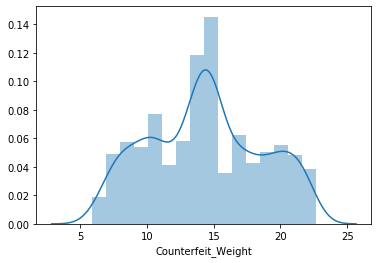

In [47]:
sns.distplot(test.Counterfeit_Weight)

### categorical variables

In [48]:
cat_cols = train.columns[train.nunique() < 25].tolist()
cat_cols

['DistArea_ID',
 'Active_Since',
 'Medicine_Type',
 'SidEffect_Level',
 'Area_Type',
 'Area_City_Type',
 'Area_dist_level']

In [49]:
nom_cat_cols = ['DistArea_ID', 'Medicine_Type', 'Area_Type']
nom_cat_cols

['DistArea_ID', 'Medicine_Type', 'Area_Type']

In [50]:
train_dummy_features = pd.DataFrame()
for i in nom_cat_cols:
# for i in cat_cols:
    train_dummy_features = pd.concat([train_dummy_features, 
                                      pd.get_dummies(train[i], 
                                                     drop_first=True, 
                                                     prefix=i)], 
                                     axis=1)

In [51]:
test_dummy_features = pd.DataFrame()
for i in nom_cat_cols:
# for i in cat_cols:
    test_dummy_features = pd.concat([test_dummy_features, 
                                     pd.get_dummies(test[i], 
                                                    drop_first=True, 
                                                    prefix=i)], 
                                    axis=1)

In [52]:
print(train_dummy_features.shape)
print(test_dummy_features.shape)

(6818, 27)
(1705, 27)


In [53]:
ord_cat_cols = ['Active_Since', 'SidEffect_Level', 'Area_City_Type', 'Area_dist_level']
ord_cat_cols

['Active_Since', 'SidEffect_Level', 'Area_City_Type', 'Area_dist_level']

In [54]:
active_since_dict = {}
for cat_num, cat in enumerate(np.sort(train.Active_Since.unique())[::-1]):
    active_since_dict['{}'.format(cat)] = cat_num
active_since_dict

{'2007': 0,
 '2005': 1,
 '2002': 2,
 '2000': 3,
 '1997': 4,
 '1996': 5,
 '1995': 6,
 '1985': 7,
 '1983': 8}

In [55]:
train['Active_Since'] = train['Active_Since'].astype('str')
test['Active_Since'] = test['Active_Since'].astype('str')

In [56]:
train['Active_Since'] = train.Active_Since.map(active_since_dict)
test['Active_Since'] = test.Active_Since.map(active_since_dict)

In [57]:
side_effect_level_dict = {'mild':0, 'critical':1}
side_effect_level_dict

{'mild': 0, 'critical': 1}

In [58]:
train['SidEffect_Level'] = train.SidEffect_Level.map(side_effect_level_dict)
test['SidEffect_Level'] = test.SidEffect_Level.map(side_effect_level_dict)

In [59]:
area_city_type_dict = {'Tier 1':2, 'Tier 3':1, 'Tier 2':1}
area_city_type_dict

{'Tier 1': 2, 'Tier 3': 1, 'Tier 2': 1}

In [60]:
train['Area_City_Type'] = train.Area_City_Type.map(area_city_type_dict)
test['Area_City_Type'] = test.Area_City_Type.map(area_city_type_dict)

In [61]:
# train

In [62]:
# test

In [63]:
area_dist_level_dict = {'Unknown':0,'Small':1, 'Medium':2, 'High':3}
area_dist_level_dict

{'Unknown': 0, 'Small': 1, 'Medium': 2, 'High': 3}

In [64]:
train['Area_dist_level'] = train.Area_dist_level.map(area_dist_level_dict)
test['Area_dist_level'] = test.Area_dist_level.map(area_dist_level_dict)

In [65]:
# train

In [66]:
# test

In [67]:
train = pd.concat([train, train_dummy_features], axis=1)
test = pd.concat([test, test_dummy_features], axis=1)

In [68]:
# train.drop(nom_cat_cols, axis=1, inplace=True)
# test.drop(nom_cat_cols, axis=1, inplace=True)

train.drop(cat_cols, axis=1, inplace=True)
test.drop(cat_cols, axis=1, inplace=True)

In [69]:
train

,Medicine_ID,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,...,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential
0,RRA15,13.100000,160.2366,0.070422,1775.5026,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,YVV26,13.565443,110.4384,0.013000,3069.1520,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,LJC15,9.025000,259.4092,0.060783,2603.0920,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,GWC40,11.800000,99.9830,0.065555,1101.7130,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,QMN13,14.296325,56.4402,0.248859,158.9402,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535000,204.1452,0.112963,2070.4520,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6814,ACW12,20.650000,235.1088,0.131103,2126.3792,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6815,OPM10,20.000000,193.6292,0.105096,2119.7212,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6816,SLY12,10.180000,162.8682,0.099957,1485.2138,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [70]:
train.dtypes

Medicine_ID                          object
Counterfeit_Weight                  float64
Medicine_MRP                        float64
Availability_rating                 float64
Counterfeit_Sales                   float64
DistArea_ID_Area013                   uint8
DistArea_ID_Area017                   uint8
DistArea_ID_Area018                   uint8
DistArea_ID_Area019                   uint8
DistArea_ID_Area027                   uint8
DistArea_ID_Area035                   uint8
DistArea_ID_Area045                   uint8
DistArea_ID_Area046                   uint8
DistArea_ID_Area049                   uint8
Medicine_Type_Antacids                uint8
Medicine_Type_Antibiotics             uint8
Medicine_Type_Antifungal              uint8
Medicine_Type_Antimalarial            uint8
Medicine_Type_Antipyretics            uint8
Medicine_Type_Antiseptics             uint8
Medicine_Type_Antiviral               uint8
Medicine_Type_Cardiac                 uint8
Medicine_Type_Hreplacements     

In [71]:
test.shape

(1705, 31)

In [72]:
test.dtypes

Medicine_ID                          object
Counterfeit_Weight                  float64
Medicine_MRP                        float64
Availability_rating                 float64
DistArea_ID_Area013                   uint8
DistArea_ID_Area017                   uint8
DistArea_ID_Area018                   uint8
DistArea_ID_Area019                   uint8
DistArea_ID_Area027                   uint8
DistArea_ID_Area035                   uint8
DistArea_ID_Area045                   uint8
DistArea_ID_Area046                   uint8
DistArea_ID_Area049                   uint8
Medicine_Type_Antacids                uint8
Medicine_Type_Antibiotics             uint8
Medicine_Type_Antifungal              uint8
Medicine_Type_Antimalarial            uint8
Medicine_Type_Antipyretics            uint8
Medicine_Type_Antiseptics             uint8
Medicine_Type_Antiviral               uint8
Medicine_Type_Cardiac                 uint8
Medicine_Type_Hreplacements           uint8
Medicine_Type_Mstablizers       

In [73]:
train.isna().sum()

Medicine_ID                         0
Counterfeit_Weight                  0
Medicine_MRP                        0
Availability_rating                 0
Counterfeit_Sales                   0
DistArea_ID_Area013                 0
DistArea_ID_Area017                 0
DistArea_ID_Area018                 0
DistArea_ID_Area019                 0
DistArea_ID_Area027                 0
DistArea_ID_Area035                 0
DistArea_ID_Area045                 0
DistArea_ID_Area046                 0
DistArea_ID_Area049                 0
Medicine_Type_Antacids              0
Medicine_Type_Antibiotics           0
Medicine_Type_Antifungal            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antipyretics          0
Medicine_Type_Antiseptics           0
Medicine_Type_Antiviral             0
Medicine_Type_Cardiac               0
Medicine_Type_Hreplacements         0
Medicine_Type_Mstablizers           0
Medicine_Type_MuscleRelaxants       0
Medicine_Type_OralContraceptives    0
Medicine_Typ

In [74]:
test.isna().sum()

Medicine_ID                         0
Counterfeit_Weight                  0
Medicine_MRP                        0
Availability_rating                 0
DistArea_ID_Area013                 0
DistArea_ID_Area017                 0
DistArea_ID_Area018                 0
DistArea_ID_Area019                 0
DistArea_ID_Area027                 0
DistArea_ID_Area035                 0
DistArea_ID_Area045                 0
DistArea_ID_Area046                 0
DistArea_ID_Area049                 0
Medicine_Type_Antacids              0
Medicine_Type_Antibiotics           0
Medicine_Type_Antifungal            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antipyretics          0
Medicine_Type_Antiseptics           0
Medicine_Type_Antiviral             0
Medicine_Type_Cardiac               0
Medicine_Type_Hreplacements         0
Medicine_Type_Mstablizers           0
Medicine_Type_MuscleRelaxants       0
Medicine_Type_OralContraceptives    0
Medicine_Type_Statins               0
Medicine_Typ

In [75]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'Medicine_MRP',
       'Availability_rating', 'Counterfeit_Sales', 'DistArea_ID_Area013',
       'DistArea_ID_Area017', 'DistArea_ID_Area018', 'DistArea_ID_Area019',
       'DistArea_ID_Area027', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'Area_Type_DownTown', 'Area_Type_Industrial',
       'Area_Type_MidTownResidential'],
      dtype='object')

In [76]:
X = train.drop(['Medicine_ID', 'Counterfeit_Sales'], axis=1)
y = train['Counterfeit_Sales']
print(X.shape)
print(y.shape)

(6818, 30)
(6818,)


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5454, 30) (5454,)
(1364, 30) (1364,)


In [78]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression(normalize=True)
lasso = Lasso(alpha=0.0001)
ridge = Ridge(alpha=0.0001)

In [79]:
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29649303.057382584, tolerance: 1575738.1163674667
  positive)


Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
pred_lr = lr.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error
r_sq_lr = r2_score(y_test, pred_lr)
print(r_sq_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)
print(mae_lr)

r_sq_lasso = r2_score(y_test, pred_lasso)
print(r_sq_lasso)
mae_lasso = mean_absolute_error(y_test, pred_lasso)
print(mae_lasso)

r_sq_ridge = r2_score(y_test, pred_ridge)
print(r_sq_ridge)
mae_ridge = mean_absolute_error(y_test, pred_ridge)
print(mae_ridge)

0.5703189032681519
823.9565799120234
0.5703046332927271
823.9476439407217
0.570304635549777
823.9475961491634


In [82]:
print(1 - (mae_lr/1660))
print(1 - (mae_lasso/1660))
print(1 - (mae_ridge/1660))

0.5036406145108293
0.5036459976260712
0.5036460264161666


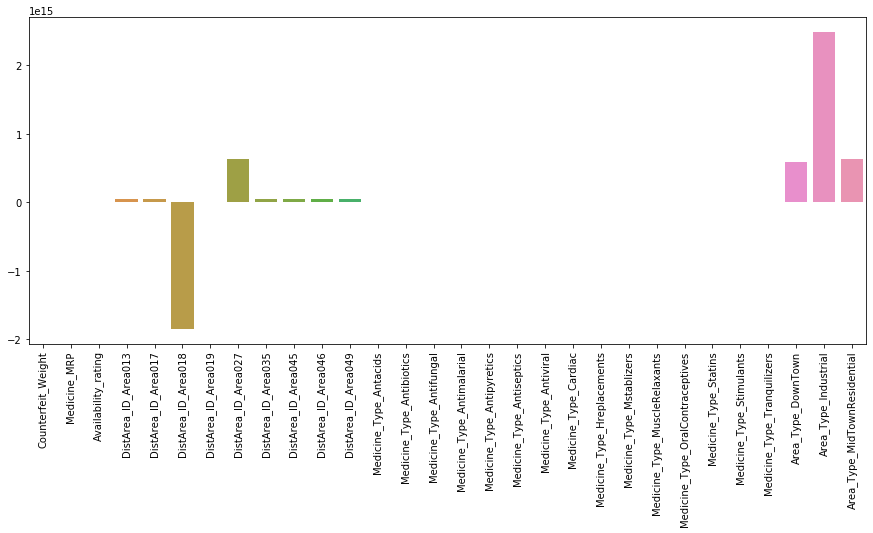

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(x=X.columns, y=lr.coef_)
plt.xticks(rotation=90)
plt.show()

In [84]:
from sklearn.ensemble import ExtraTreesRegressor
ex_tree = ExtraTreesRegressor()

In [85]:
ex_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [86]:
ex_tree.feature_importances_

array([5.77259021e-02, 4.33871902e-01, 7.94840504e-02, 8.84961142e-03,
       9.98375255e-03, 1.98191535e-03, 1.07335946e-04, 7.46091624e-02,
       9.53629369e-03, 8.02342551e-03, 7.94992226e-03, 1.00902099e-02,
       5.38209668e-03, 1.31788671e-02, 3.83633945e-03, 6.85098324e-03,
       1.03468434e-02, 1.15695495e-02, 2.52471044e-03, 8.92801499e-03,
       1.44696341e-02, 7.40948691e-03, 2.71022379e-03, 1.09395652e-02,
       4.66984396e-03, 3.86012020e-03, 7.00105010e-03, 2.79358698e-03,
       1.64713345e-03, 1.79668467e-01])

In [87]:
data = {'Feature_Name':X.columns, 'Feature_Importance':ex_tree.feature_importances_}

feat_imp = pd.DataFrame(data).sort_values(by='Feature_Importance', ascending=False)
feat_imp

,Feature_Name,Feature_Importance
1,Medicine_MRP,0.433872
29,Area_Type_MidTownResidential,0.179668
2,Availability_rating,0.079484
7,DistArea_ID_Area027,0.074609
0,Counterfeit_Weight,0.057726
20,Medicine_Type_Hreplacements,0.014470
13,Medicine_Type_Antibiotics,0.013179
17,Medicine_Type_Antiseptics,0.011570
23,Medicine_Type_OralContraceptives,0.010940
16,Medicine_Type_Antipyretics,0.010347


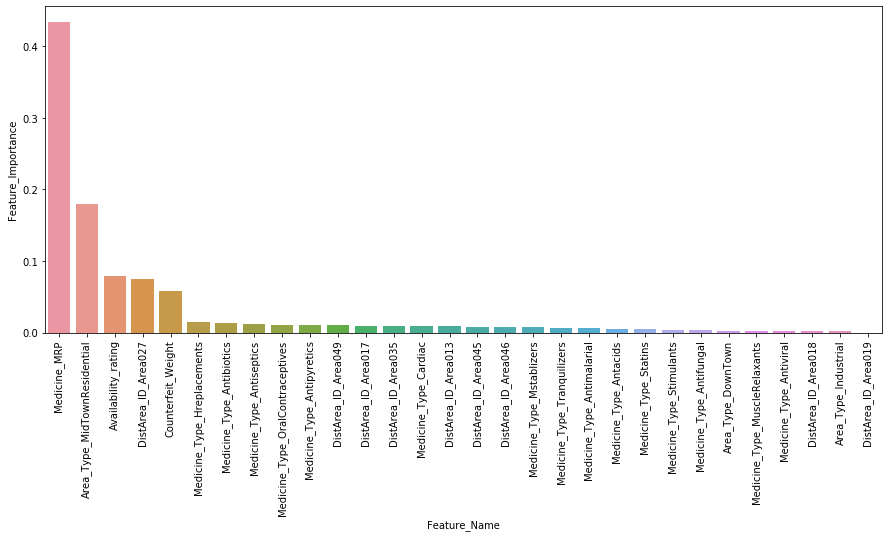

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(data=feat_imp, x='Feature_Name', y='Feature_Importance')
plt.xticks(rotation=90)
plt.show()

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dt = DecisionTreeRegressor(max_depth=5, ccp_alpha=0.005,
                           max_leaf_nodes=10, 
                           min_impurity_split=50, min_samples_leaf=10, 
                           random_state=101)

In [91]:
dt.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


DecisionTreeRegressor(ccp_alpha=0.005, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=50,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=101, splitter='best')

In [92]:
pred_dt = dt.predict(X_test)

In [93]:
mae_dt = mean_absolute_error(y_test, pred_dt)

In [94]:
mae_dt

779.499225545682

In [95]:
1 - (mae_dt/1660)

0.5304221532857338

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf = RandomForestRegressor(n_estimators=500,min_samples_leaf=40,
                           max_depth=25,
                           max_leaf_nodes=50,
                           min_impurity_decrease=0.005,
                           random_state=101)

In [98]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=50,
                      max_samples=None, min_impurity_decrease=0.005,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [99]:
pred_rf = rf.predict(X_test)

In [100]:
mae_rf = mean_absolute_error(y_test, pred_rf)

In [101]:
mae_rf

756.529435632092

In [102]:
f_imp = pd.DataFrame(zip(X.columns, rf.feature_importances_), 
                     columns=['Feature', 'Feature_Imp'])

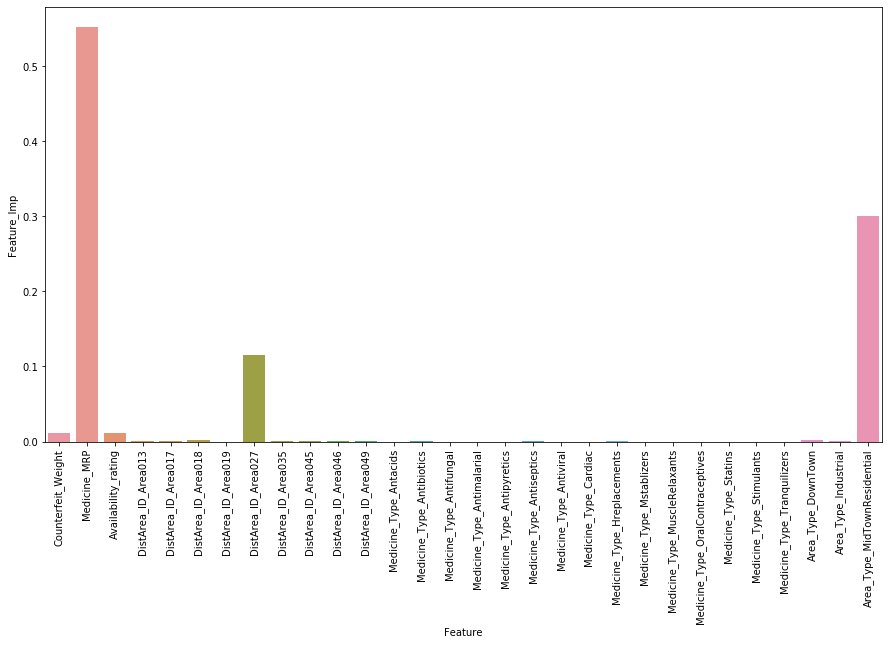

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(data=f_imp, x='Feature', y='Feature_Imp')
plt.xticks(rotation=90)
plt.show()

In [104]:
1 - mae_rf/1660

0.5442593761252458